# AirBnB EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
df = pd.read_csv("D:\Analytics Project\Airbnb\Airbnb_Open_Data.csv")
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [2]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [3]:
df['country'] = df['country'].fillna('United States')
#Since the data analysis is about United States.

In [4]:
df['country code'] = df['country code'].fillna('US')
#Similar to country column we can fill United States code as US

In [5]:
df['price'] = df['price'].str.replace('$1,060 ','$1,060')
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
#converting string to int or float data type since its in numeric form.

In [6]:
df['service fee'] = df['service fee'].str.replace('$','')
#converting string to int or float data type since its in numeric form.

In [7]:
df[['price','service fee']].isna().sum()

price          247
service fee    273
dtype: int64

In [8]:
df['neighbourhood group']=df['neighbourhood group'].replace('brookln','Brooklyn')
df['neighbourhood group']=df['neighbourhood group'].replace('manhatan','Manhattan')

In [9]:
df.groupby('neighbourhood group')['price'].mean()

neighbourhood group
Bronx            627.766359
Brooklyn         626.561078
Manhattan        622.436508
Queens           630.207647
Staten Island    624.490546
Name: price, dtype: float64

In [10]:
ls = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
def calc_price(valu):
    ans = df[(df['neighbourhood group']==valu)&(df['price'].isna())]
    print(ans.index)
calc_price('Bronx')

Int64Index([13601, 24327, 36920, 36921, 51214, 65648, 65767], dtype='int64')


In [11]:
ls = [13601, 24327, 36920, 36921, 51214, 65648, 65767]
for i in ls:
    df['price'] = df['price'].fillna({i:627.766359})

In [12]:
df['price'] =df['price'].fillna(622.436508)

In [13]:
df['price'].isna().sum()

0

In [14]:
df['service fee'] = df['service fee'].fillna(0)
df['service fee'] = df['service fee'].astype(int)

In [15]:
df.groupby('neighbourhood group')['service fee'].mean()

neighbourhood group
Bronx            125.172935
Brooklyn         124.896590
Manhattan        124.161647
Queens           125.717193
Staten Island    124.482723
Name: service fee, dtype: float64

In [16]:
l = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
ls1 = []
def calc_price(valu):
    ans = df[(df['neighbourhood group']==valu)&(df['service fee']==0)]
    ls1.append(ans.index)
    print(ls1)
calc_price('Manhattan')

[Int64Index([    15,     18,   2169,   2170,   2171,   2173,   2174,   6614,
              6618,   6619,
            ...
             97708,  97762,  97765,  97766, 102039, 102048, 102049, 102052,
            102056, 102057],
           dtype='int64', length=111)]


In [17]:
#ls = [ 2177,   6616,   6617,   6653,  13454,  30896,  41177,  51223]
#for i in ls:
    #df['service fee'] = df['service fee'].fillna({i:124.896590})

In [18]:
df['service fee'] = df['service fee'].fillna(124.529118)

id,name,host id,host name,lat,long,house_rules,license

In [19]:
per = (df.isna().sum()/df.shape[0])*100
#per
#percentage of null values in each and every column.

In [20]:
dd = df[['neighbourhood group','room type','Construction year','price','service fee','review rate number']]

In [21]:
#Dont consider about duplicates since this is not a duplicated one its a repeated or possibility values.

In [22]:
df[['neighbourhood group','neighbourhood']].isna().sum()

neighbourhood group    29
neighbourhood          16
dtype: int64

In [23]:
df.groupby('neighbourhood group')[['lat','long']].mean()

,lat,long
neighbourhood group,,
Bronx,40.849289,-73.883191
Brooklyn,40.683825,-73.950496
Manhattan,40.765288,-73.974404
Queens,40.728520,-73.867637
Staten Island,40.611668,-74.105042


In [24]:
c = df['neighbourhood'][df['neighbourhood group'].isna()].value_counts()
c
d=df['neighbourhood']
e =df['neighbourhood group']
print(d)

0                  Kensington
1                     Midtown
2                      Harlem
3                Clinton Hill
4                 East Harlem
                 ...         
102594           Williamsburg
102595    Morningside Heights
102596             Park Slope
102597       Long Island City
102598        Upper West Side
Name: neighbourhood, Length: 102599, dtype: object


In [25]:
df[['lat','long','neighbourhood']][df['neighbourhood group'].isna()].value_counts()

lat       long       neighbourhood     
40.67870  -73.97262  Prospect Heights      1
40.72413  -73.76133  Queens Village        1
40.83139  -73.94095  Washington Heights    1
40.82976  -73.94867  Harlem                1
40.82399  -73.95328  Harlem                1
40.80942  -73.93936  East Harlem           1
40.80518  -73.95359  Harlem                1
40.79471  -73.96918  Upper West Side       1
40.79320  -73.94007  East Harlem           1
40.76865  -73.95058  Upper East Side       1
40.75038  -73.90334  Woodside              1
40.74859  -73.99671  Chelsea               1
40.72828  -73.98801  East Village          1
40.72636  -73.98917  East Village          1
40.72354  -73.98295  East Village          1
40.68233  -73.97261  Prospect Heights      1
40.71659  -73.98945  Chinatown             1
40.71398  -73.95763  Williamsburg          1
40.71363  -73.96019  Williamsburg          1
40.71156  -73.96218  Williamsburg          1
40.71088  -73.95055  Williamsburg          1
40.71031  -73.9

In [26]:
df[['lat','long','neighbourhood group']][df['neighbourhood'].isna()].value_counts()

lat       long       neighbourhood group
40.65992  -73.99042  Brooklyn               1
40.68012  -73.97847  Brooklyn               1
40.68016  -73.94878  Brooklyn               1
40.71300  -73.99752  Manhattan              1
40.71580  -73.95803  Brooklyn               1
40.71693  -73.98948  Manhattan              1
40.72709  -73.98274  Manhattan              1
40.72723  -73.95728  Brooklyn               1
40.73089  -73.98195  Manhattan              1
40.73641  -73.95330  Brooklyn               1
40.73693  -73.95316  Brooklyn               1
40.73783  -73.95259  Brooklyn               1
40.75348  -73.97065  Manhattan              1
40.76217  -73.98411  Manhattan              1
40.78304  -73.97447  Manhattan              1
40.79816  -73.96190  Manhattan              1
dtype: int64

In [27]:
df[['neighbourhood','lat','long']][(df['neighbourhood group']=='Brooklyn')].value_counts()

neighbourhood       lat       long     
Greenpoint          40.73756  -73.95350    15
Bedford-Stuyvesant  40.68210  -73.91245     6
Greenpoint          40.73778  -73.95366     6
Boerum Hill         40.68826  -73.98558     6
Williamsburg        40.71232  -73.94220     6
                                           ..
Bedford-Stuyvesant  40.69424  -73.94420     1
                    40.69423  -73.94627     1
Fort Greene         40.69519  -73.97202     1
Bedford-Stuyvesant  40.69422  -73.93232     1
Bushwick            40.69997  -73.92054     1
Length: 27120, dtype: int64

In [28]:
df['neighbourhood group'].value_counts().count()

5

In [ ]:
Brooklyn  Williamsburg,
Manhattan  East Village,
Brooklyn      Bushwick,
Manhattan        Harlem
Brooklyn  Clinton Hill,
Brooklyn  Prospect Heights,
Manhattan   East Harlem
Manhattan  Washington Heights
,Manhattan  Upper East Side,
Queens      Woodside
Manhattan       Chelsea,
Bronx   Eastchester,
Manhattan     Chinatown,
Queens  Queens Village
Brooklyn  Bedford-Stuyvesant
Manhattan  Upper West Side
ls = ['Brooklyn','Manhattan','Queens','Bronx']
#dict = {'Brooklyn':['Williamsburg','Bushwick','Clinton Hill','Prospect Heights','Bedford-Stuyvesant'],
       #'Manhattan':['East Village','Harlem','East Harlem','Washington Heights','Upper East Side', 'Chelsea','Chinatown'],
       #'Queens':['Woodside','Queens Village'],
       #'Bronx':['Eastchester']}


In [ ]:
lss = []
def calc(val):
    for ii in val:
        cc = df[(df['neighbourhood']==ii)&(df['neighbourhood group'].isna())]
        lss.append(cc.index)
    print(lss)
calc(val=['East Village','Harlem','East Harlem','Washington Heights','Upper East Side', 'Chelsea','Chinatown'])

In [ ]:
ls = [90, 161, 287, 319, 415,91, 249, 40383,75, 168,92, 206,448]
for i in ls: 
    df['neighbourhood group'] = df['neighbourhood group'].fillna({i:'Brooklyn'})

In [ ]:
df['neighbourhood group'] = df['neighbourhood group'].fillna('Manhattan')

In [ ]:
df['neighbourhood group'].isna().sum()

In [ ]:
import seaborn as sns
sns.countplot(x=df['neighbourhood group'])

In [ ]:
sns.countplot(x=df['neighbourhood group'],hue=df['room type'])

In [ ]:
sns.boxplot(df['price'])

In [ ]:
sns.boxplot(df['service fee'])

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Relationship between price and service fee", size=25, color="green")
sns.scatterplot(x=df['price'], y=df['service fee'], hue=df['room type'],s=30);

In [ ]:
df[df['service fee']==0].isna().sum()

In [ ]:
airbnb = df.to_csv('Airbnb.csv')

In [ ]:
df['room type'].value_counts()

In [ ]:
df['cancellation_policy'].dropna()

In [ ]:
sns.boxplot(df['minimum nights'],linewidth=25)

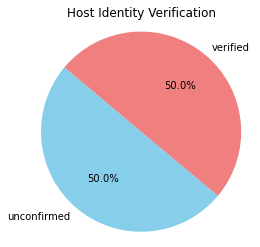

In [30]:
value_counts = df['host_identity_verified'].value_counts()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Host Identity Verification')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

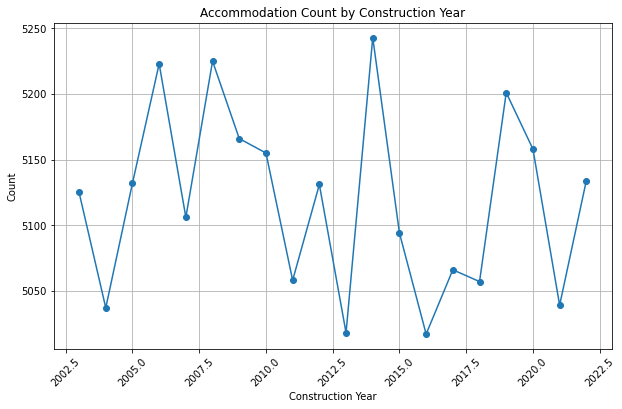

In [31]:
construction_year_count = df.groupby('Construction year')['price'].count()

# Create a line graph
plt.figure(figsize=(10, 6))
construction_year_count.plot(kind='line', marker='o')
plt.title('Accommodation Count by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

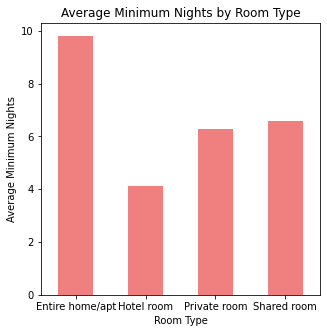

In [32]:
grouped_by_room = df.groupby('room type')['minimum nights'].mean()

# Create a bar graph
plt.figure(figsize=(5, 5))
grouped_by_room.plot(kind='bar', color='lightcoral')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=0)
plt.show()

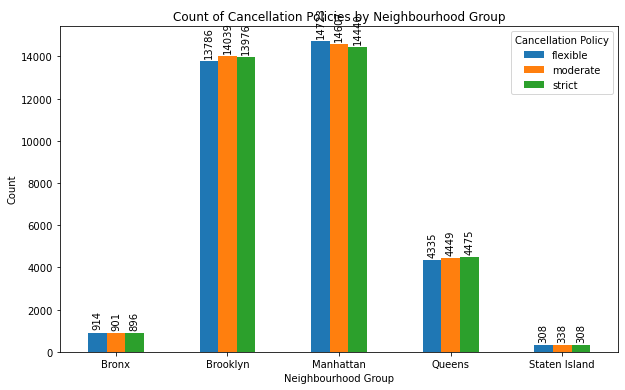

In [33]:
cancel_counts = df.groupby(['neighbourhood group', 'cancellation_policy'])['cancellation_policy'].count().unstack()

# Plotting side-by-side bar chart
ax = cancel_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Cancellation Policies by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cancellation Policy')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=90)

plt.show()